# Analyse FLAME latent space

### Add parent folder

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

### import

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from models.NormBase import NormBase
from utils.load_config import load_config
from utils.load_Flame import load_FLAME_csv_params

"""
run: python -m projects.memory_efficiency.00_flame_affectnet
"""

np.set_printoptions(precision=2, linewidth=200, suppress=True)

config_path = 'NB_Memory_Efficiency.json'
# load config
config = load_config(config_path, path='../../configs/norm_base_config')


path = "/Users/michaelstettler/PycharmProjects/BVS/data/AffectNet_FLAME"
train_csv = "flame_training_params.csv"
test_csv = "flame_validation_params.csv"

df_train = pd.read_csv(os.path.join(path, train_csv), index_col=0)
#df_test = pd.read_csv(os.path.join(path, test_csv), index_col=0)
print(df_train.head())
# print(df_test.head())

#train_data = load_FLAME_csv_params(df_train)
#test_data = load_FLAME_csv_params(df_test)

                               subDirectory_filePath expression  \
0  0000792211b64f6a59bd2d95fee49eabe6373ec1d88f22...      Anger   
1  0000f8a4575c15055a9ee0a72c9aa5bf9ac00558173565...    Neutral   
2  00012312112a15995f1d1c1ac640db7191eacab8099e90...      Happy   
3  0001636b7a16a63b2d9c8f5e4b7be02e4841d3e0af3ebd...      Anger   
4  0001720743cf22095bd3b2c94b35f244faf47545e26168...      Happy   

                                              params  
0  [ 2.2839723   0.30307168 -0.13677676 -0.269403...  
1  [-0.32497066 -0.05917249 -0.11331706  0.025499...  
2  [ 3.0442486   0.7089056  -0.12053777 -0.404545...  
3  [ 2.89004564e+00  6.52720213e-01 -2.35721603e-...  
4  [ 0.2560467  -0.23615539 -0.04972909 -0.083052...  


## keep only 100 entry of each category

In [41]:
train_data = load_FLAME_csv_params(df_train.head(8000))  # 8000 is fine to get 100 image for each category
print("shape train_data[0]", np.shape(train_data[0]))

shape params (8000,)


100%|██████████| 8000/8000 [00:00<00:00, 1740014.10it/s]

shape train_data[0] (8000, 50)


In [83]:
# declare variables
x_train = []
y_train = []
n_images = 50

# retrieve 100 images from each images
train_x = train_data[0]
train_y = train_data[1]
for i in range(7):
    x = train_x[train_y == i]
    
    if len(x) < n_images:
        print("Not enough images!")
    
    x_train.append(x[:n_images])
    y_train.append(np.ones(n_images)*i)

x_train = np.array(x_train)
y_train = np.array(y_train)
print("shape x_train", np.shape(x_train))
print("shape y_train", np.shape(y_train))

shape x_train (7, 50, 50)
shape y_train (7, 50)


## Plot

In [84]:
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:cyan']

### Plot histogram

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


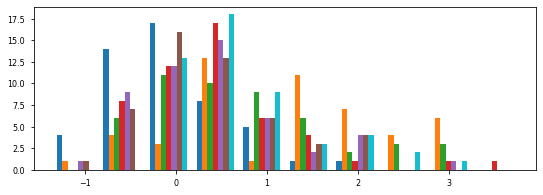

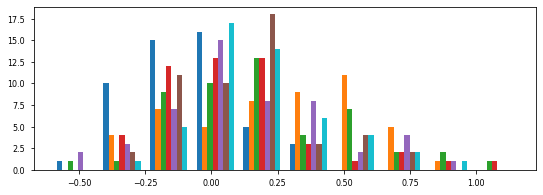

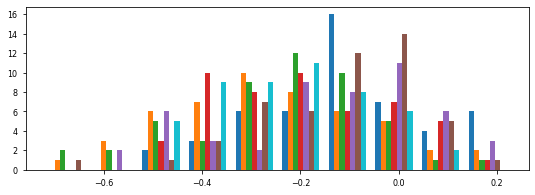

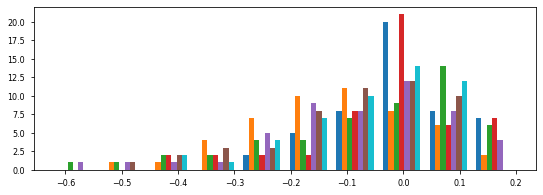

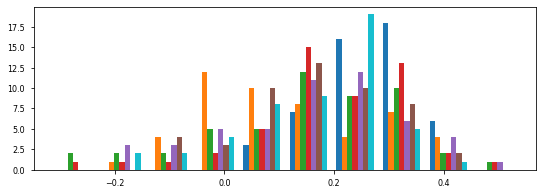

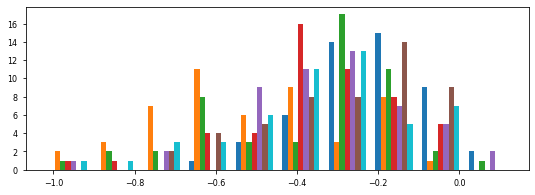

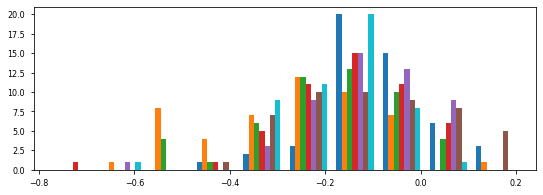

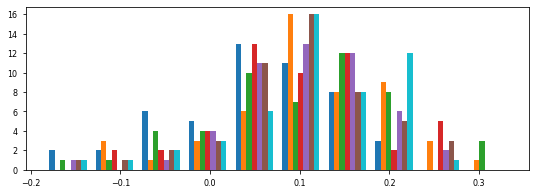

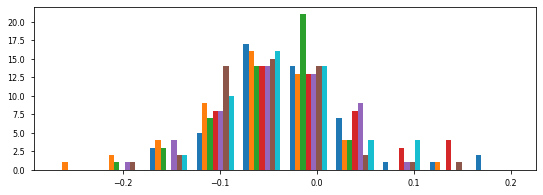

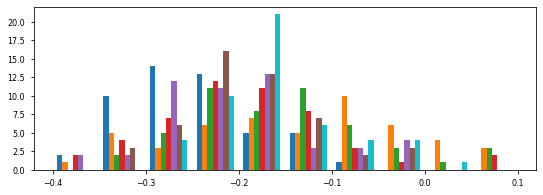

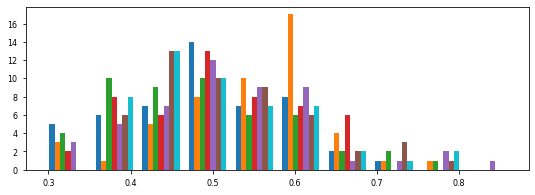

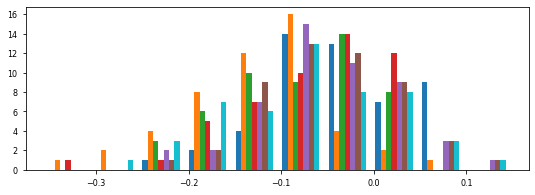

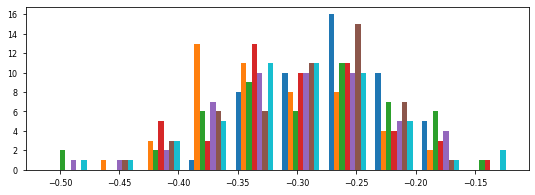

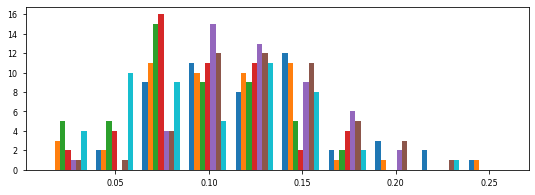

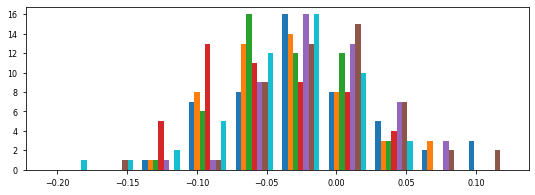

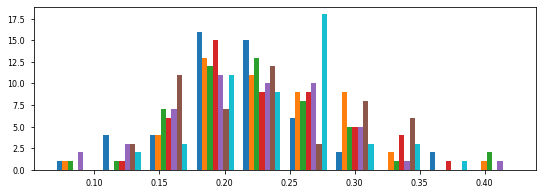

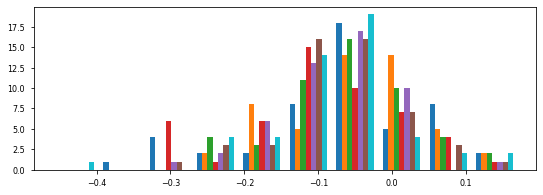

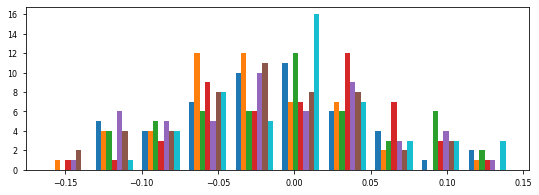

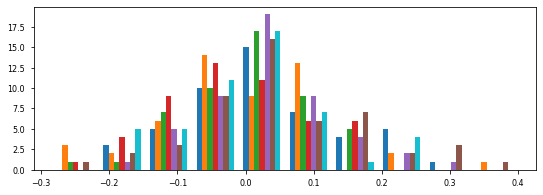

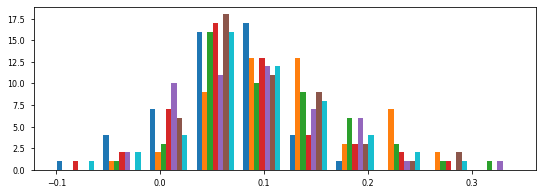

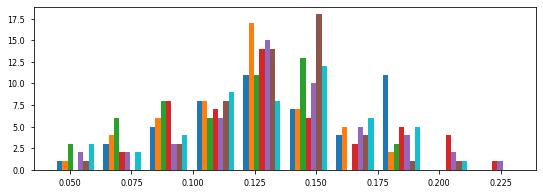

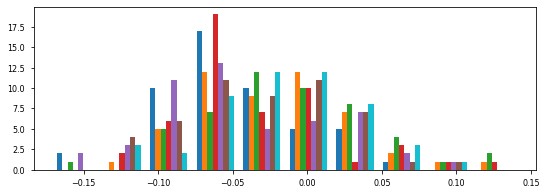

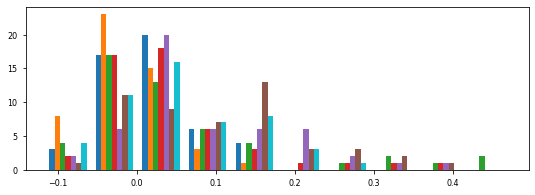

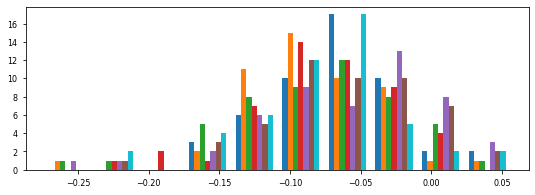

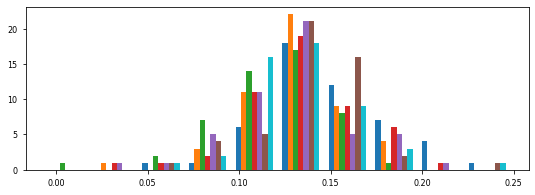

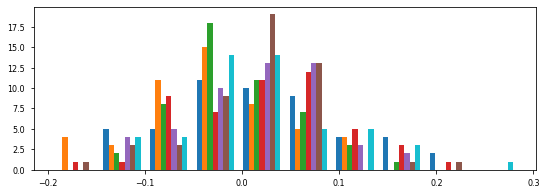

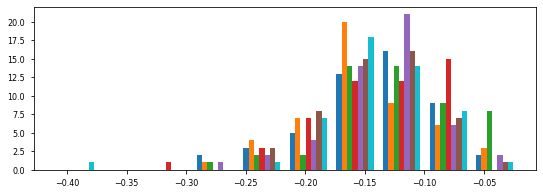

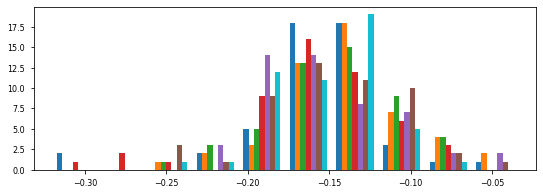

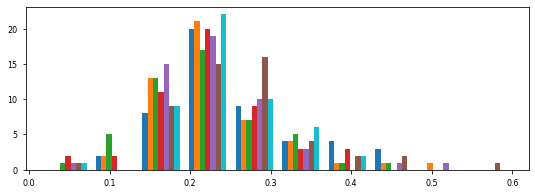

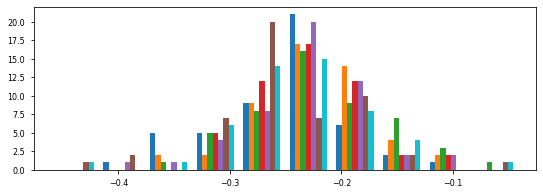

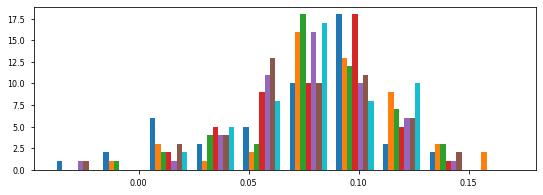

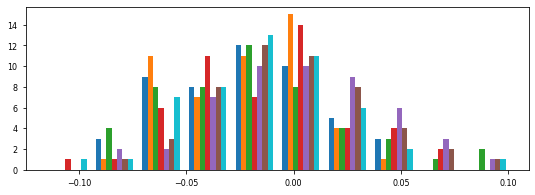

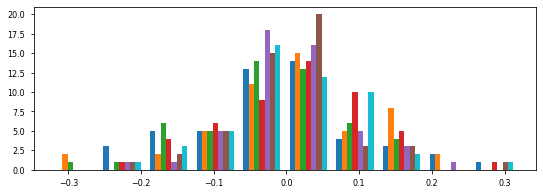

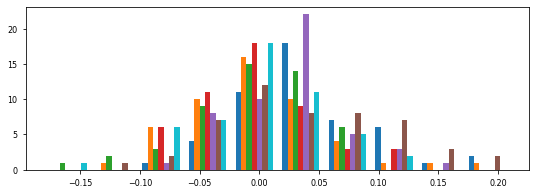

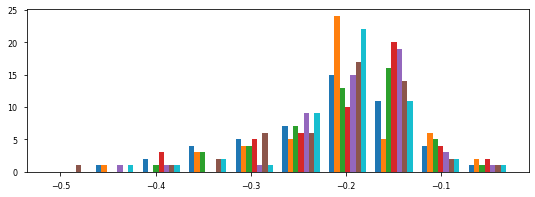

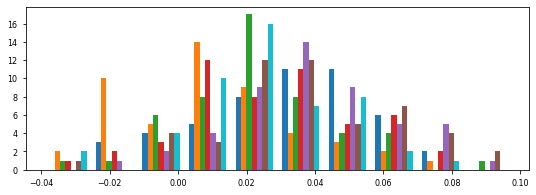

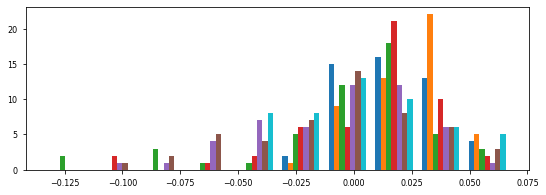

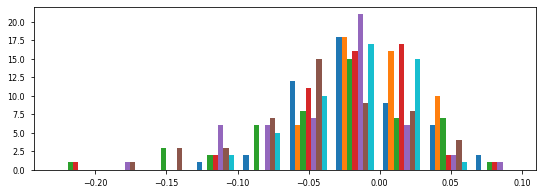

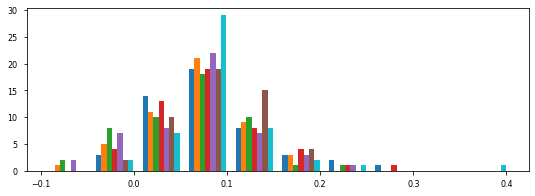

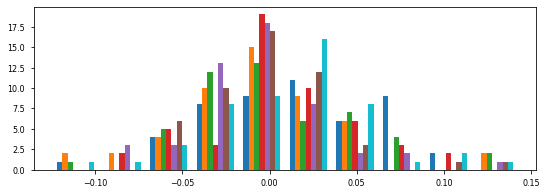

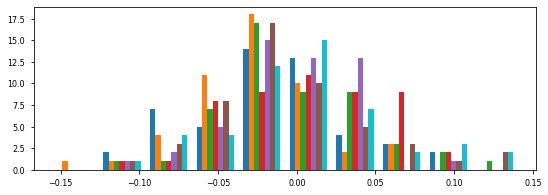

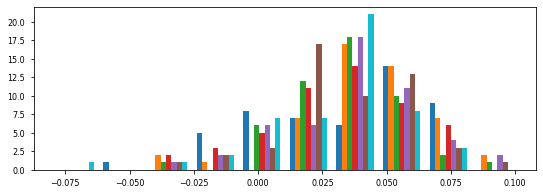

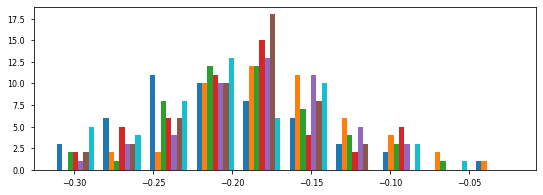

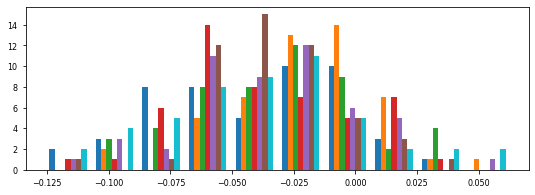

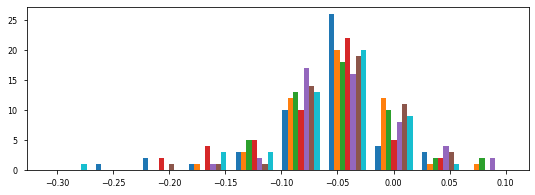

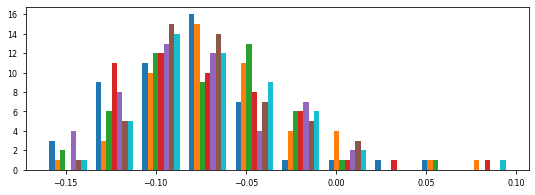

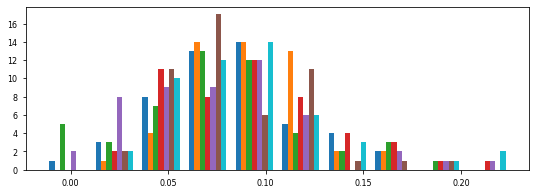

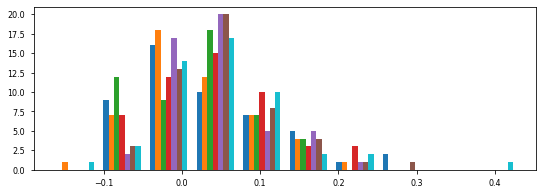

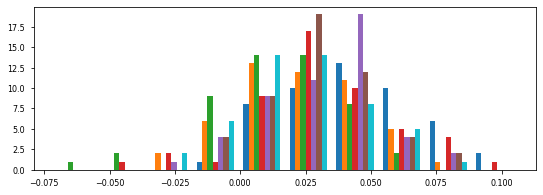

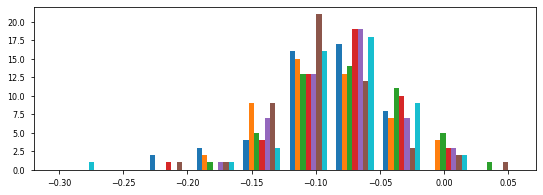

In [85]:
n_dim = np.shape(x_train)[2]
for i in range(n_dim):
    x = x_train[..., i].T # set category to axis 1 
    
    plt.figure(figsize=(9, 3))
    bins = plt.hist(x, histtype='bar', color=colors)

### plot 1st dimension vs. others

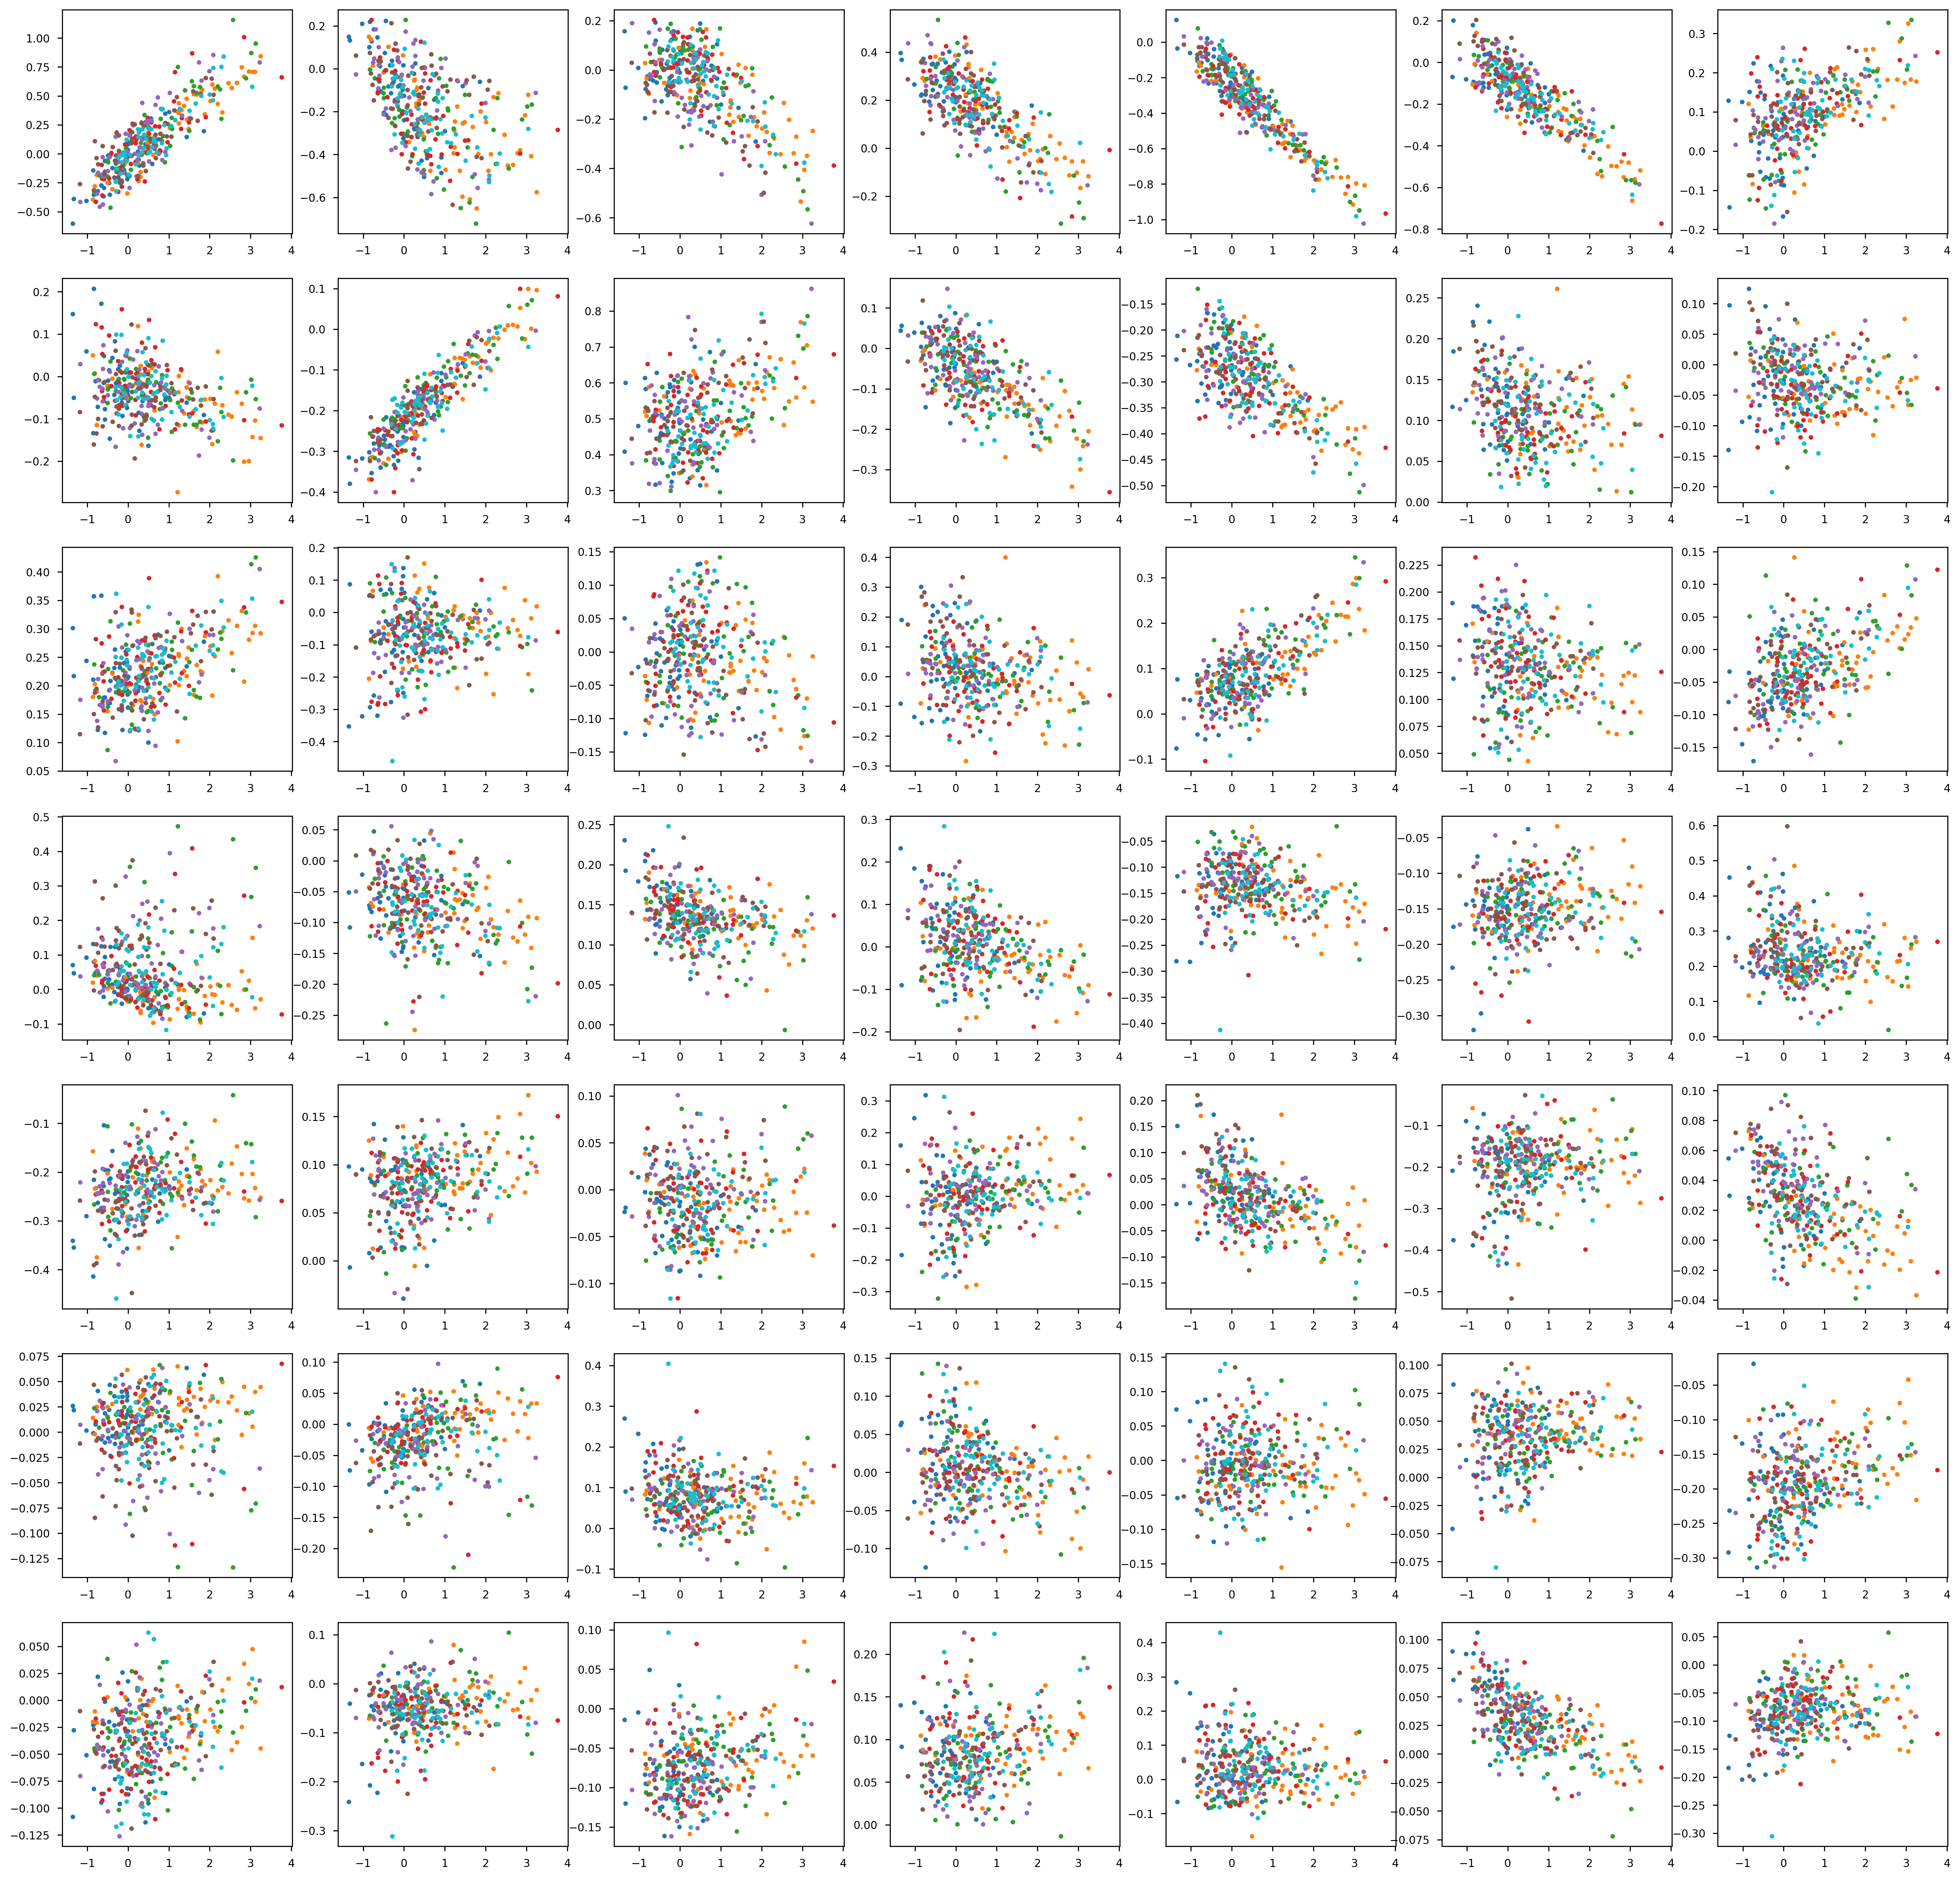

In [87]:
n_cat = np.shape(x_train)[0]

plt.figure(dpi=300, figsize=(25, 25))

for i in range(7):
    for j in range(7):
        plt.subplot(7, 7, i*7 + j + 1)

        for cat in range(n_cat):
            plt.scatter(x_train[cat, :, 0], x_train[cat, :, i*7 + j + 1], s=10, color=colors[cat])
            
plt.savefig("scatter.jpg")